In [2]:
import copy
import pandas
import warnings
import subprocess
from matplotlib import pyplot as plt
import os
import sys

sys.path.insert(0, "../src")
#csv_file = "../datasets/genny2/summary.csv"
# csv_file = "/tmp/summary.csv"
csv_file = "../datasets/genny2/perf_stack2.csv"


<AxesSubplot: title={'center': 'ES2 Load: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency'>

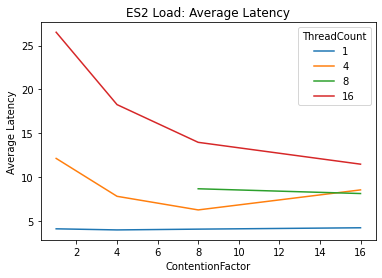

In [3]:
# Make a pivot table for average latency for load and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("Query == 'load' & Experiment == 'es2'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

piv.plot(title="ES2 Load: Average Latency", ylabel="Average Latency")


In [4]:
# Make a pivot table for operation throughput for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '1' & Experiment == 'es3'")


,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
81,81,query_es3_1_1.q1.reads,query_es3_1_1,es3,q1.reads,fixed_1: fixed_hf,1,1,1,7.186788e+06,...,1,1,8333504.0,7112099.0,7.221600e+10,0.0,10000.0,10000.0,3550000.0,4.107997e+11
86,86,query_es3_1_4.q1.reads,query_es3_1_4,es3,q1.reads,fixed_1: fixed_hf,1,1,4,7.450860e+06,...,4,4,8834246.0,7149190.0,1.872100e+10,0.0,10000.0,10000.0,3550000.0,1.304808e+12
91,91,query_es3_1_8.q1.reads,query_es3_1_8,es3,q1.reads,fixed_1: fixed_hf,1,1,8,7.488919e+06,...,8,8,14678540.0,7175399.0,9.498000e+09,0.0,10000.0,10000.0,3550000.0,1.798245e+12
96,96,query_es3_1_16.q1.reads,query_es3_1_16,es3,q1.reads,fixed_1: fixed_hf,1,1,16,1.463343e+07,...,16,16,47735598.0,7360513.0,9.335000e+09,0.0,10000.0,10000.0,3550000.0,3.094105e+12
101,101,query_es3_4_1.q1.reads,query_es3_4_1,es3,q1.reads,fixed_1: fixed_hf,1,4,1,7.251985e+06,...,1,1,8419213.0,7193613.0,7.289100e+10,0.0,10000.0,10000.0,3550000.0,3.703586e+11
106,106,query_es3_4_4.q1.reads,query_es3_4_4,es3,q1.reads,fixed_1: fixed_hf,1,4,4,7.871233e+06,...,4,4,9019534.0,7484436.0,1.976000e+10,0.0,10000.0,10000.0,3550000.0,9.215395e+11
111,111,query_es3_4_8.q1.reads,query_es3_4_8,es3,q1.reads,fixed_1: fixed_hf,1,4,8,7.706551e+06,...,8,8,19067683.0,7323150.0,9.733999e+09,0.0,10000.0,10000.0,3550000.0,1.347911e+12
116,116,query_es3_4_16.q1.reads,query_es3_4_16,es3,q1.reads,fixed_1: fixed_hf,1,4,16,1.488869e+07,...,16,16,85223193.0,7416381.0,9.725999e+09,0.0,10000.0,10000.0,3550000.0,1.898262e+12
121,121,query_es3_8_1.q1.reads,query_es3_8_1,es3,q1.reads,fixed_1: fixed_hf,1,8,1,7.565757e+06,...,1,1,8453895.0,7493795.0,7.599500e+10,0.0,10000.0,10000.0,3550000.0,3.800826e+11
126,126,query_es3_8_4.q1.reads,query_es3_8_4,es3,q1.reads,fixed_1: fixed_hf,1,8,4,8.061519e+06,...,4,4,10643165.0,7709653.0,2.032300e+10,0.0,10000.0,10000.0,3550000.0,8.879136e+11


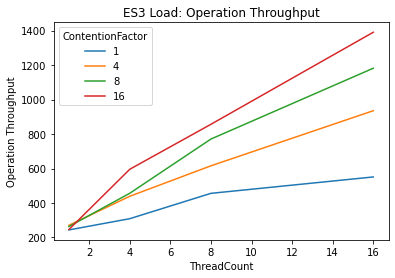

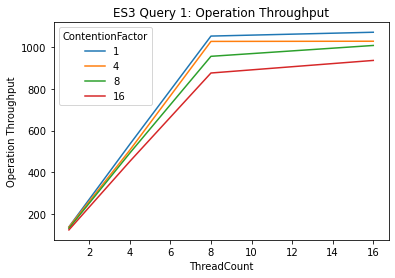

In [18]:
def plot_op_by_thread(query, title):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(csv_file)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == 'es3'")
    # piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
    piv = pd1.pivot(index='ThreadCount', columns="ContentionFactor", values="OperationThroughput")

    # piv
    piv.plot(title=f"ES3 {title}: Operation Throughput", ylabel="Operation Throughput")

plot_op_by_thread("load", "Load")
plot_op_by_thread("1", "Query 1")


<AxesSubplot: title={'center': 'ES3 Query 2: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency (ms)'>

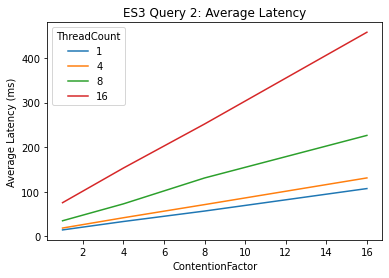

In [8]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")
piv.plot(title="ES3 Query 2: Average Latency", ylabel="Average Latency (ms)")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv.plot(title="ES3 Query 2: Operation Throughput", ylabel="Operation Throughput")